#20240510


#sarahfong

- This is RNA-seq data aligned with PARTEKflow's STAR aligner pipeline. 
- Data comes from Gene Counts, not Transcript Counts, Quantify to annotation model (Partek E/M) using hg38 - Ensembl Transcripts release 103, filtered gene counts <=10, then normalized to count per million

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import stats
import seaborn as sns
import sys

### data

In [33]:
os.chdir(os.path.expanduser("~"))  #$HOME

# go to datapath
PATH =  "./EMF/data/rnaseq/Partek_PEMF_WTC11-NGN2_SF_DESeq2_PEMF_60_vs_control"
RE = "/wynton/home/ahituv/fongsl/EMF/results/rnaseq"
os.chdir(PATH)
COUNT_FILE = "counts.txt" # normalized counts
DESEQFILE = "gsa_result.txt" # normalized counts

In [3]:
# load data
deseq = pd.read_csv(DESEQFILE, sep='\t')
count = pd.read_csv(COUNT_FILE, sep='\t')

#df.sort_values(by=["gene_name", "gene_version"])

### compute median cpm

In [4]:
count.head()

,Feature,WTC11_PEMF1,WTC11_ctrl2,WTC11_PEMF4,WTC11_ctrl4,WTC11_PEMF2,WTC11_ctrl1,WTC11_PEMF3,WTC11_ctrl3
0,7SK,1.85150,2.53821,2.10047,2.75146,2.19816,1.57057,1.46614,3.46960
1,A1BG,11.50300,10.59320,10.80020,11.16780,9.96907,10.03090,8.80267,9.17134
2,A1BG-AS1,3.81976,3.73680,4.31978,3.19254,3.73035,3.51154,4.36586,3.97639
3,A2M,1.42314,1.98823,1.31104,1.05204,1.46064,1.22973,1.31468,1.94544
4,A2M-AS1,5.26130,4.54452,4.56749,3.64167,5.77907,5.34664,7.43082,4.16879


In [5]:
deseq.head()

,Gene ID,Gene name,Chromosome,Start,Stop,Length,Strand,Total counts,Maximum counts,Geometric mean,...,Gene version,P-value (PEMF 60' vs control),FDR step up (PEMF 60' vs control),Ratio (PEMF 60' vs control),Log2(Ratio) (PEMF 60' vs control),Fold change (PEMF 60' vs control),LSMean(PEMF 60') (PEMF 60' vs control),LSMean(control) (PEMF 60' vs control),FC 95% lower limit (PEMF 60' vs control),FC 95% upper limit (PEMF 60' vs control)
0,7SK,7SK,6,52995620,52995951,331,+,17.946111,3.469604,2.161787,...,1,0.618931,?,0.739964,-0.434472,-1.351416,1.904660,2.573989,-4.427853,2.424459
1,A1BG,A1BG,19,58345178,58353493,8315,-,82.038151,11.502996,10.216092,...,12,0.990481,?,1.003385,0.004875,1.003385,10.271488,10.236841,-1.736226,1.747999
2,A1BG-AS1,A1BG-AS1,19,58347718,58355456,7738,+,30.653031,4.365862,3.813885,...,6,0.795317,?,1.126392,0.171709,1.126392,4.060407,3.604791,-2.181967,2.768389
3,A2M,A2M,12,9067664,9116230,48566,-,11.724931,1.988227,1.434478,...,15,0.870728,?,0.886729,-0.173435,-1.127741,1.376980,1.552876,-4.797590,3.772287
4,A2M-AS1,A2M-AS1,12,9065163,9068690,3527,+,40.740295,7.430818,4.983886,...,4,0.518548,?,1.297324,0.375538,1.297324,5.754614,4.435758,-1.698883,2.859303


In [6]:
fdr = deseq.loc[(deseq["FDR step up (PEMF 60' vs control)"]!="?")].copy() # remove genes w/ no test

fdr = fdr.loc[(fdr["FDR step up (PEMF 60' vs control)"].astype(float)<0.05)]
fdr.sort_values(by=["Fold change (PEMF 60' vs control)"], ascending =False)

,Gene ID,Gene name,Chromosome,Start,Stop,Length,Strand,Total counts,Maximum counts,Geometric mean,...,Gene version,P-value (PEMF 60' vs control),FDR step up (PEMF 60' vs control),Ratio (PEMF 60' vs control),Log2(Ratio) (PEMF 60' vs control),Fold change (PEMF 60' vs control),LSMean(PEMF 60') (PEMF 60' vs control),LSMean(control) (PEMF 60' vs control),FC 95% lower limit (PEMF 60' vs control),FC 95% upper limit (PEMF 60' vs control)
3167,CNTN1,CNTN1,12,40692439,41072416,379977,+,9905.039569,1774.551671,1198.406358,...,15,2.531057e-08,3.772540586628903E-5,1.565876,0.646970,1.565876,1511.209603,965.089040,1.337349,1.833453
8343,NRXN1,NRXN1,2,49918503,51225576,1307073,-,3098.883612,543.540321,376.701108,...,24,1.412157e-08,3.772540586628903E-5,1.540506,0.623405,1.540506,469.733745,304.921660,1.326844,1.788575
6359,KIAA1109,KIAA1109,4,122152331,122362759,210428,+,1998.927146,348.562954,242.758933,...,16,3.962116e-07,2.662600897022013E-4,1.534922,0.618165,1.534922,302.603330,197.145779,1.300660,1.811376
4698,FAT1,FAT1,4,186587794,186726723,138929,-,675.666280,122.036828,81.876715,...,14,2.381720e-04,0.01442874278490778E0,1.534831,0.618080,1.534831,102.235550,66.610291,1.221302,1.928848
8750,PCDHA12,PCDHA12,5,140875302,141012348,137046,+,803.635229,136.132198,97.749919,...,5,8.544748e-05,0.007892143497512953E0,1.515965,0.600236,1.515965,121.018989,79.829687,1.231817,1.865658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9191,PLEKHA6,PLEKHA6,1,204218853,204377666,158813,-,752.910987,132.915131,91.110969,...,16,3.276262e-04,0.01683885444830691E0,0.657405,-0.605147,-1.521133,74.678386,113.595774,-1.912284,-1.209991
3444,CTIF,CTIF,18,48539031,48863218,324187,+,579.094825,109.569272,69.199701,...,14,9.292001e-04,0.03693260860363893E0,0.630206,-0.666104,-1.586782,55.988792,88.841989,-2.085488,-1.207332
6386,KIF21B,KIF21B,1,200969390,201023715,54325,-,1426.021281,265.096694,170.640589,...,15,3.206293e-05,0.005973725455697364E0,0.623307,-0.681986,-1.604347,136.919301,219.666001,-2.004748,-1.283916
2934,CHD3,CHD3,17,7884796,7912761,27965,+,639.448233,123.118319,75.598497,...,17,1.383835e-04,0.01082653664502638E0,0.589052,-0.763534,-1.697644,59.265593,100.611904,-2.228694,-1.293132


In [7]:
N = 10
top_n = list(fdr.sort_values(by=["Fold change (PEMF 60' vs control)"], ascending=False)["Gene name"].head(n=N))
bottom_n= list(fdr.sort_values(by=["Fold change (PEMF 60' vs control)"], ascending=True)["Gene name"].head(n=N))

/wynton/home/ahituv/fongsl/.conda/envs/mamba/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/scratch/fongsl/ipykernel_2556271/3268978270.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
/scratch/fongsl/ipykernel_2556271/3268978270.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")


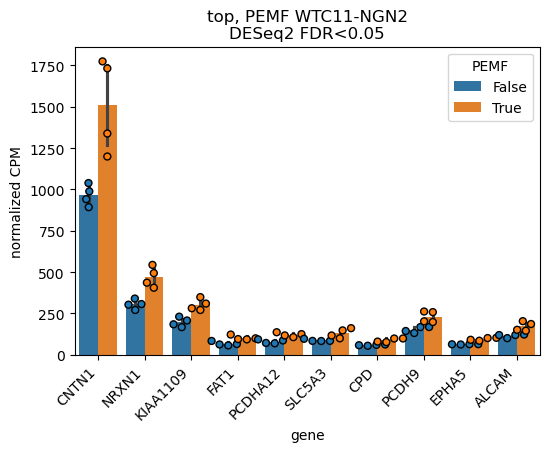

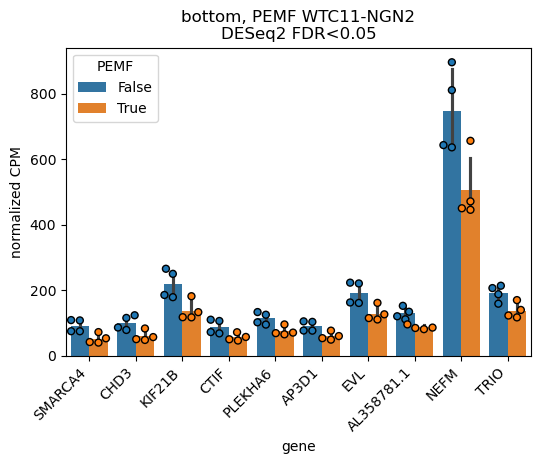

In [34]:
for genelist, direction in [(top_n, "top"), (bottom_n, "bottom")]:
    
    gene_df = count.loc[count["Feature"].isin(genelist)].copy()
    gene_dfmelt = pd.melt(gene_df, id_vars="Feature") # melt by gene

    # annotate treated v. control
    gene_dfmelt["PEMF"] = gene_dfmelt["variable"].apply(lambda x: True if "PEMF" in x else False) 

    gene_dfmelt["rep"] = gene_dfmelt["variable"].apply(lambda x: list(x)[-1]) # annotate replicate

    fig, ax=plt.subplots(figsize=(6,4))
    sns.barplot(x='Feature', 
                y="value", 
                hue='PEMF',
                data=gene_dfmelt, 
                order=genelist
               )
    sns.swarmplot(x='Feature',
                  y="value", 
                  hue='PEMF', 
                  data=gene_dfmelt, 
                  dodge=True, 
                  order=genelist, 
                  edgecolor='k', 
                  linewidth=1,
                 legend=False
                 )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
    ax.set(xlabel="gene", 
          ylabel="normalized CPM", 
            title=f"{direction}, PEMF WTC11-NGN2\nDESeq2 FDR<0.05"
          )
    out = os.path.join(RE, f"deseq2.fdr05.genes.{direction}.PEMF.WTC11.pdf")
    plt.savefig(out, bbox_inches="tight")


In [31]:
RE

'../../../results/rnaseq'